<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_3_6_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_3.6_n20.csv',
 'data_add_delta_3.6_n30.csv',
 'data_add_delta_3.6_n60.csv',
 'data_add_delta_3.6_n120.csv',
 'data_add_delta_3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,26.676458,20.137417,85.063092,-6.178207e+04,-6.164019e+04,6.673180e+05,-7.289582e+05
1,0.0,1.0,68.557615,73.345181,37.909268,4.431096e+05,4.432995e+05,-3.123092e+06,3.566392e+06
2,0.0,2.0,74.849614,76.130482,52.715544,5.895347e+06,5.895560e+06,-4.762567e+06,1.065813e+07
3,0.0,3.0,27.157307,97.588727,82.828396,-4.720115e+07,-4.720094e+07,-1.216890e+07,-3.503204e+07
4,0.0,4.0,50.344053,84.376157,78.431236,-6.414203e+06,-6.413980e+06,-9.011030e+06,2.597051e+06
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,49.458661,58.888732,22.922752,-5.633883e+06,-5.633742e+06,-4.009772e+06,-1.623970e+06
29996,999.0,26.0,66.857273,88.314641,55.994911,-3.656539e+06,-3.656318e+06,-1.517331e+06,-2.138987e+06
29997,999.0,27.0,98.850813,77.493794,78.415525,4.266707e+06,4.266971e+06,4.650241e+05,3.801947e+06
29998,999.0,28.0,91.183790,24.032265,66.630093,-7.887359e+04,-7.868175e+04,5.641628e+05,-6.428446e+05


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,26.676458,20.137417,85.063092,-6.178207e+04,-6.164019e+04,6.673180e+05,-7.289582e+05
1,0.0,1.0,68.557615,73.345181,37.909268,4.431096e+05,4.432995e+05,-3.123092e+06,3.566392e+06
2,0.0,2.0,74.849614,76.130482,52.715544,5.895347e+06,5.895560e+06,-4.762567e+06,1.065813e+07
3,0.0,3.0,27.157307,97.588727,82.828396,-4.720115e+07,-4.720094e+07,-1.216890e+07,-3.503204e+07
4,0.0,4.0,50.344053,84.376157,78.431236,-6.414203e+06,-6.413980e+06,-9.011030e+06,2.597051e+06
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,49.458661,58.888732,22.922752,-5.633883e+06,-5.633742e+06,-4.009772e+06,-1.623970e+06
29996,999.0,26.0,66.857273,88.314641,55.994911,-3.656539e+06,-3.656318e+06,-1.517331e+06,-2.138987e+06
29997,999.0,27.0,98.850813,77.493794,78.415525,4.266707e+06,4.266971e+06,4.650241e+05,3.801947e+06
29998,999.0,28.0,91.183790,24.032265,66.630093,-7.887359e+04,-7.868175e+04,5.641628e+05,-6.428446e+05


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    26.676458  20.137417  ...  6.673180e+05 -7.289582e+05
      1.0    68.557615  73.345181  ... -3.123092e+06  3.566392e+06
      2.0    74.849614  76.130482  ... -4.762567e+06  1.065813e+07
      3.0    27.157307  97.588727  ... -1.216890e+07 -3.503204e+07
      4.0    50.344053  84.376157  ... -9.011030e+06  2.597051e+06
...                ...        ...  ...           ...           ...
999.0 25.0   49.458661  58.888732  ... -4.009772e+06 -1.623970e+06
      26.0   66.857273  88.314641  ... -1.517331e+06 -2.138987e+06
      27.0   98.850813  77.493794  ...  4.650241e+05  3.801947e+06
      28.0   91.183790  24.032265  ...  5.641628e+05 -6.428446e+05
      29.0   72.376674  97.198664  ...  1.827467e+06  1.212489e+07

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    26.676458  20.137417  ...  6.673180e+05 -7.289582e+05
      1.0    68.557615  73.345181  ... -3.123092e+06  3.566392e+06
      2.0    74.849614  76.130482  ... -4.762567e+06  1.065813e+07
      3.0    27.157307  97.588727  ... -1.216890e+07 -3.503204e+07
      4.0    50.344053  84.376157  ... -9.011030e+06  2.597051e+06
...                ...        ...  ...           ...           ...
999.0 25.0   49.458661  58.888732  ... -4.009772e+06 -1.623970e+06
      26.0   66.857273  88.314641  ... -1.517331e+06 -2.138987e+06
      27.0   98.850813  77.493794  ...  4.650241e+05  3.801947e+06
      28.0   91.183790  24.032265  ...  5.641628e+05 -6.428446e+05
      29.0   72.376674  97.198664  ...  1.827467e+06  1.212489e+07

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,26.676458,20.137417,85.063092,-6.178207e+04,-6.164019e+04,6.673180e+05,-7.289582e+05
1,0.0,1.0,68.557615,73.345181,37.909268,4.431096e+05,4.432995e+05,-3.123092e+06,3.566392e+06
2,0.0,2.0,74.849614,76.130482,52.715544,5.895347e+06,5.895560e+06,-4.762567e+06,1.065813e+07
3,0.0,3.0,27.157307,97.588727,82.828396,-4.720115e+07,-4.720094e+07,-1.216890e+07,-3.503204e+07
4,0.0,4.0,50.344053,84.376157,78.431236,-6.414203e+06,-6.413980e+06,-9.011030e+06,2.597051e+06
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,49.458661,58.888732,22.922752,-5.633883e+06,-5.633742e+06,-4.009772e+06,-1.623970e+06
29996,999.0,26.0,66.857273,88.314641,55.994911,-3.656539e+06,-3.656318e+06,-1.517331e+06,-2.138987e+06
29997,999.0,27.0,98.850813,77.493794,78.415525,4.266707e+06,4.266971e+06,4.650241e+05,3.801947e+06
29998,999.0,28.0,91.183790,24.032265,66.630093,-7.887359e+04,-7.868175e+04,5.641628e+05,-6.428446e+05


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    26.676458  20.137417  ...  6.673180e+05 -7.289582e+05
      1.0    68.557615  73.345181  ... -3.123092e+06  3.566392e+06
      2.0    74.849614  76.130482  ... -4.762567e+06  1.065813e+07
      3.0    27.157307  97.588727  ... -1.216890e+07 -3.503204e+07
      4.0    50.344053  84.376157  ... -9.011030e+06  2.597051e+06
...                ...        ...  ...           ...           ...
999.0 25.0   49.458661  58.888732  ... -4.009772e+06 -1.623970e+06
      26.0   66.857273  88.314641  ... -1.517331e+06 -2.138987e+06
      27.0   98.850813  77.493794  ...  4.650241e+05  3.801947e+06
      28.0   91.183790  24.032265  ...  5.641628e+05 -6.428446e+05
      29.0   72.376674  97.198664  ...  1.827467e+06  1.212489e+07

[30000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

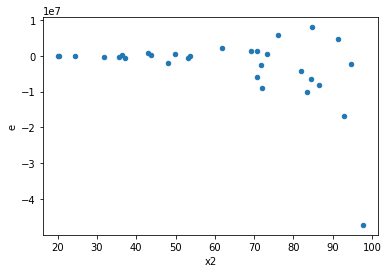

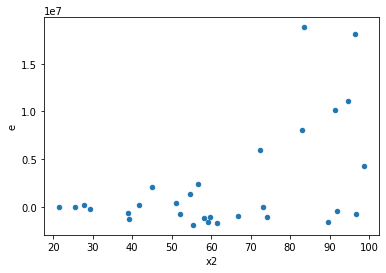

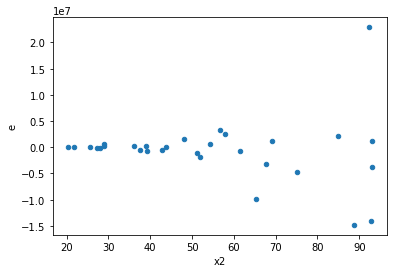

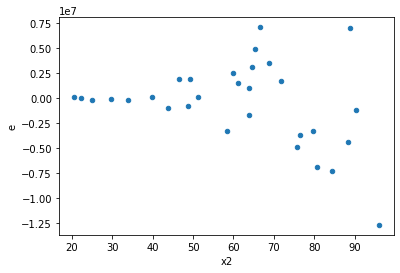

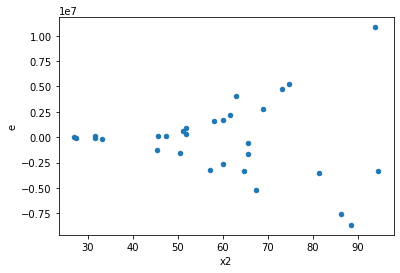

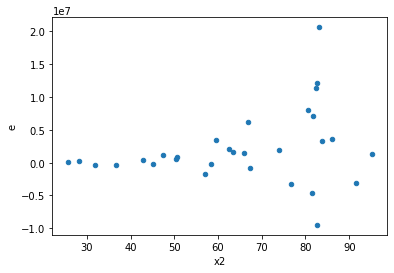

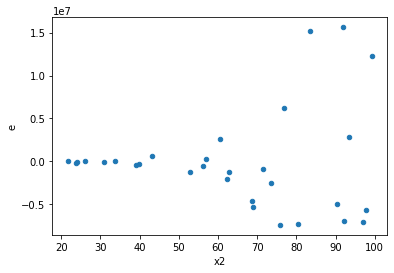

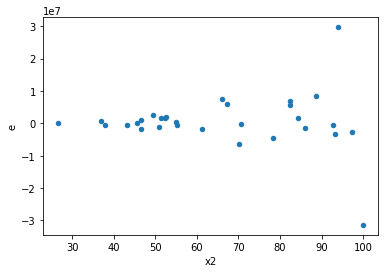

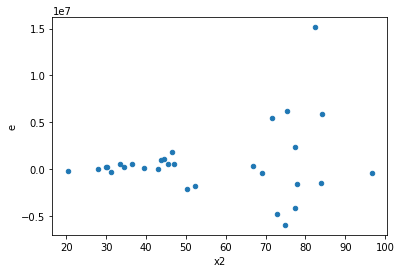

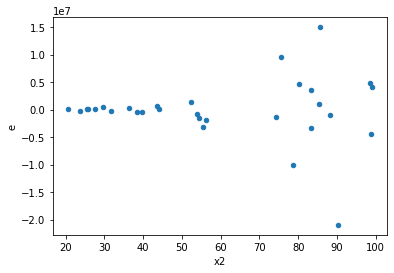

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,9.0,9.0,1628052362208042.5,4457203717500.296,203506545276005.3,557150464687.537,365.2631706771285,3.8157588200249393e-10,0.9999999998092121,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,478217968780104.2,12380423567228.234,59777246097513.02,1547552945903.5293,38.62694730784312,7.932460035720013e-06,0.9999960337699821,Reject001=0 : Heteroscedasticity
2.0,9.0,9.0,966028187448521.6,1217912269170.667,120753523431065.2,152239033646.33337,793.1837225897519,1.1771694730100535e-11,0.9999999999941142,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,207769431812432.4,17963209603503.99,25971178976554.05,2245401200437.9985,11.566386876201896,0.0011846324853521661,0.9994076837573239,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,316173009348142.94,4853726576331.173,39521626168517.87,606715822041.3966,65.14025962853707,8.14784030023219e-07,0.999999592607985,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,513119378358818.0,15444279271012.09,64139922294852.25,1930534908876.5112,33.223912191351644,1.516438285475985e-05,0.9999924178085726,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,898187456202786.6,585206554755.4111,112273432025348.33,73150819344.42639,1534.8212505551767,6.064038160502605e-13,0.9999999999996968,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,1690115968620897.2,11971134402644.87,211264496077612.16,1496391800330.6086,141.18260740999514,2.6636082228748137e-08,0.9999999866819589,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,333763792830475.75,728564917973.7428,41720474103809.47,91070614746.71785,458.1112603647276,1.382636227731382e-10,0.9999999999308682,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,1628052362208042.5,4457203717500.296,203506545276005.3,557150464687.537,365.2631706771285,3.8157588200249393e-10,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,478217968780104.2,12380423567228.234,59777246097513.02,1547552945903.5293,38.62694730784312,7.932460035720013e-06,Reject001=0 : Heteroscedasticity
2.0,9.0,9.0,966028187448521.6,1217912269170.667,120753523431065.2,152239033646.33337,793.1837225897519,1.1771694730100535e-11,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,207769431812432.4,17963209603503.99,25971178976554.05,2245401200437.9985,11.566386876201896,0.0011846324853521661,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,316173009348142.94,4853726576331.173,39521626168517.87,606715822041.3966,65.14025962853707,8.14784030023219e-07,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,513119378358818.0,15444279271012.09,64139922294852.25,1930534908876.5112,33.223912191351644,1.516438285475985e-05,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,898187456202786.6,585206554755.4111,112273432025348.33,73150819344.42639,1534.8212505551767,6.064038160502605e-13,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,1690115968620897.2,11971134402644.87,211264496077612.16,1496391800330.6086,141.18260740999514,2.6636082228748137e-08,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,333763792830475.75,728564917973.7428,41720474103809.47,91070614746.71785,458.1112603647276,1.382636227731382e-10,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    999
Reject001=1 : Homoscedasticity        1
Name: Result_test, dtype: int64